## [[데이콘] 항공사 고객 만족도 예측 경진대회](https://dacon.io/competitions/official/235871/overview/description)

### train.csv : 학습 데이터
- id : 샘플 아이디
- Gender : 성별
- Customer Type : Disloyal 또는 Loyal 고객
- Age : 나이
- Type of Travel : Business 또는 Personal Travel
- Class : 등급
- Flight Distance : 비행 거리
- Seat comfort : 좌석 만족도
- Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
- Food and drink : 식음료 만족도
- Gate location : 게이트 위치 만족도
- Inflight wifi service : 기내 와이파이 서비스 만족도
- Inflight entertainment : 기내 엔터테인먼트 만족도
- Online support : 온라인 지원 만족도
- Ease of Online booking : 온라인 예매 편리성 만족도
- On-board service : 탑승 서비스 만족도
- Leg room service : Leg room 서비스 만족도
- Baggage handling : 수하물 처리 만족도
- Checkin service : 체크인 서비스 만족도
- Cleanliness : 청결도 만족도
- Online boarding : 온라인보딩 만족도
- Departure Delay in Minutes : 출발 지연 시간
- Arrival Delay in Minutes : 도착 지연 시간
- target : 만족 여부


### test.csv : 테스트 데이터
- target column excluded

### sample_submissoin.csv : 제출 양식
- id : 샘플 아이디
- target : 만족 여부

# Import packages and train dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from keras.models import Sequential
from keras.layers.core import Dense, Activation

warnings.filterwarnings(action='ignore')

heart_data = pd.read_csv('./data/train.csv')
heart_data.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


# Missing data check

In [3]:
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

check_missing_col(heart_data)

결측치가 존재하지 않습니다


# Labeled encoding data features
- sex
    - female = 0, male = 1
- cp: 가슴 통증(chest pain) 종류 
  - 0: asymptomatic 무증상
  - 1: atypical angina 일반적이지 않은 협심증
  - 2: non-anginal pain 협심증이 아닌 통증
  - 3: typical angina 일반적인 협심증
- fbs: (fasting blood sugar) 공복 중 혈당
    - 120 mg/dl 이하일 시 = 0
    - 120 mg/dl 초과일 시 = 1
- restecg: (resting electrocardiographic) 휴식 중 심전도 결과 
  - 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
  - 1: 정상
  - 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- exang: (exercise induced angina) 활동으로 인한  협심증 여부
    - 없음 = 0
    - 있음 = 1
- slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기
  - 0: downsloping 하강
  - 1: flat 평탄
  - 2: upsloping 상승
- ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개) 
  - Null 값은 숫자 4로 인코딩됨
- thal: thalassemia 지중해빈혈 여부
  - 0: Null 
  - 1: normal 정상
  - 2: fixed defect 고정 결함
  - 3: reversable defect 가역 결함
- target: 심장 질환 진단 여부
  - 0: < 50% diameter narrowing
  - 1: > 50% diameter narrowing

# Process label encoding features to one-hot encoding
pd.get_dummies()를 통해 자동으로 one-hot encoding으로 변경해 줄 수 있다.

'ca' column이 가질 수 있는 값의 범위는 0~4 이지만 train dataset에서 ca=4인 data가 없으므로 직접 'ca_4' column을 생성해준다.

In [4]:
#train_x = train data except 'id', 'target'
train_x = heart_data.drop(['id', 'target'], axis=1)
train_x = pd.get_dummies(train_x, columns= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])
train_x = pd.get_dummies(train_x, columns= ['ca'])
ca_4 = []
for i in range(train_x.shape[0]):
    ca_4.append(0)
train_x['ca_4'] = ca_4
print(train_x.shape)
print(train_x.head())

#train_y = train data only 'target'
train_y = heart_data[['target']]
print(train_y.shape)
print(train_y.head())

(151, 30)
   age  trestbps  chol  thalach  oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  ...  \
0   53       130   197      152      1.2      0      1     0     0     1  ...   
1   52       152   298      178      1.2      0      1     0     0     0  ...   
2   54       192   283      195      0.0      0      1     0     1     0  ...   
3   45       138   236      152      0.2      1      0     1     0     0  ...   
4   35       122   192      174      0.0      0      1     0     1     0  ...   

   slope_2  thal_0  thal_1  thal_2  thal_3  ca_0  ca_1  ca_2  ca_3  ca_4  
0        0       0       0       1       0     1     0     0     0     0  
1        0       0       0       0       1     1     0     0     0     0  
2        1       0       0       0       1     0     1     0     0     0  
3        0       0       0       1       0     1     0     0     0     0  
4        1       0       0       1       0     1     0     0     0     0  

[5 rows x 30 columns]
(151, 1)
   target
0       1
1

# Creat deep learning model
순차 layer는 3개의 deep learning 층으로 2개 모두 64개의 cell을 가지도록 임의로 지정, activation function은 relu로 하였습니다.

마지막 output layer는 activation function을 sigmoid로 하였습니다.

optimizer는 Nadam, loss는 binary_crossentropy로 하여 batch_size=64, 500회 반복학습시켰습니다.

In [17]:
model = Sequential()
model.add(Dense(64, input_dim=train_x.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(train_x, train_y, epochs=500, batch_size=64)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                1984      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 1s 16ms/step - loss: 1.6036 - accuracy: 0.5116
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 0.7361 - accuracy: 0.5725
Epoch 3/500
3/3 [==============================] - 0

# Loss and accuracy against epoch plot 

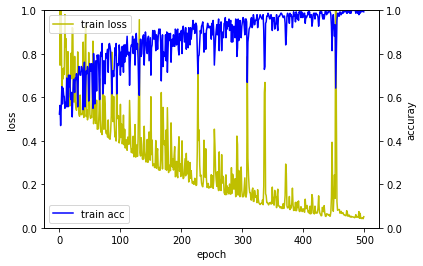

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


# Model evaluation

In [19]:
loss_and_metrics = model.evaluate(train_x, train_y, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

5/5 [==============================] - 0s 5ms/step - loss: 0.0479 - accuracy: 0.9868
loss_and_metrics : [0.047855038195848465, 0.9867549538612366]


# Prediction with test dataset 

In [10]:
test_data = pd.read_csv('./data/test.csv')
result = pd.DataFrame()
result['id'] = test_data['id']
test_data = test_data.drop(['id'], axis=1)
test_data = pd.get_dummies(test_data, columns= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
target = model.predict(np.array(test_data))
#0.5 보다 큰 추정값은 심장질환이 있을 것으로 예측 -> 1,  0.5보다 작은 값은 심장질환 없을 것으로 예측 -> 0
for i in range(target.shape[0]):
    if target[i] > 0.5:
        target[i] = 1
    else :
        target[i] = 0
result['target'] = target
print(result.head())

   id  target
0   1     0.0
1   2     0.0
2   3     1.0
3   4     0.0
4   5     0.0


# Make output file by prediction result

In [51]:
result.to_csv('output.csv', index=False)